### Differentially Private Logistic Regression Based on Noisy Gradient Descent
###### . In this project, we developed a differentially private logistic regression by implementing noisy gradient        descent.

### Packages
##### In this part we call initial packages and function.

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from Func import *
import copy
import math
from numpy.linalg import norm 

### Load Training Data
###### The hypothetical training dataset contains two medical features of 100 individuals. And labels classify individuals to high risk and low risk of developing a disease.

In [204]:
X_train, y_train = load_data("data")
m,n = X_train.shape

### DP Parameters

In [205]:
G=np.zeros(n)
for i in range(n):
    G[i]=np.amax(X_train[:,i])

In [206]:
norm(X_train,2)


951.0147639592734

In [207]:
G_MAX=np.amax(G)
G_MAX

99.82785779692128

In [208]:
epsilon=0.1
delta=0.001
T=100
sigma_w=(2*G_MAX/m)*np.sqrt(2*T*np.log(1/delta))*(1/epsilon)
sigma_b=(2*1/m)*np.sqrt(2*T*np.log(1/delta))*(1/epsilon)
mu=0

### Plot training data

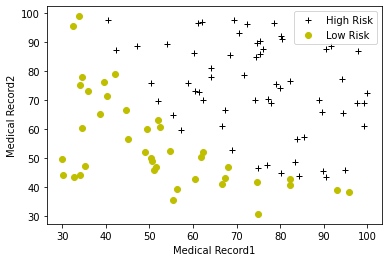

In [209]:
plt.figure(facecolor='white')
plot_data(X_train, y_train, pos_label="High Risk", neg_label="Low Risk")
plt.ylabel('Medical Record2') 
plt.xlabel('Medical Record1') 
plt.legend(loc="upper right")
plt.show()

### Sigmoid Function

In [210]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

### Cost Function

In [211]:
def compute_cost(X, y, w, b, lambda_= 1):
   
    m,n = X_train.shape
    loss_sum = 0
    z_wb = 0

    for i in range(m): 
        
        z_wb = np.dot(X[i],w)
        z_wb += b 
        f_wb= sigmoid(z_wb);
        loss = -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb);
        loss_sum += loss 

    total_cost = (1 / m) * loss_sum 


    return total_cost

### Compute Gradient

In [212]:
def compute_gradient(X, y, w, b, lambda_=None): 
   
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    
    for i in range(m):
        z_wb = 0
 
        for j in range(n):
            z_wb_ij = w[j]*X[i][j];
            z_wb += z_wb_ij
            
        z_wb += b
        f_wb = sigmoid(z_wb);
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i])* X[i][j]
            dj_dw[j] += dj_dw_ij
            
    dj_dw = dj_dw / m+ np.random.normal(mu, sigma_w)/m
    dj_db = dj_db / m+ np.random.normal(mu, sigma_b)/m
 
    return dj_db, dj_dw


### Gradient Descent

In [213]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    m = len(X)
   
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        if i<100000:     
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

        
    return w_in, b_in, J_history, w_history 

### Learning The Parameters

In [214]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8

iterations = T
alpha = 0.001
w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.74   
Iteration   10: Cost     0.36   
Iteration   20: Cost     0.34   
Iteration   30: Cost     0.33   
Iteration   40: Cost     0.31   
Iteration   50: Cost     0.32   
Iteration   60: Cost     0.43   
Iteration   70: Cost     0.37   
Iteration   80: Cost     0.31   
Iteration   90: Cost     0.32   
Iteration   99: Cost     0.33   


## Plot Decision Boundary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


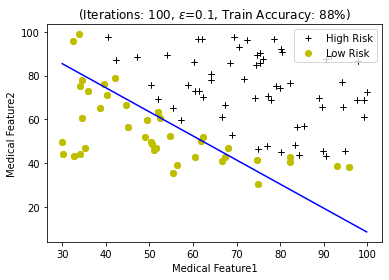

In [216]:
plt.legend(loc="upper right")
plot_data(X_train, y_train, pos_label="High Risk", neg_label="Low Risk")
plt.ylabel('Medical Feature2') 
plt.xlabel('Medical Feature1') 
plt.legend(loc="upper right")
plt.title("(Iterations: 100, $\epsilon$=0.1, Train Accuracy: 88%)")

plot_decision_boundary(w, b, X_train, y_train)


### Predict Function

In [217]:
def predict(X, w, b): 
    
   
    m, n = X.shape   
    p = np.zeros(m)
   
    for i in range(m):   
        z_wb = 0
    
        for j in range(n): 
            z_wb_ij = w[j]*X[i][j]
        
            
            z_wb += z_wb_ij
        
     
        z_wb += b
        
        
        f_wb = sigmoid(z_wb)

       
        p[i] = f_wb >= 0.5
        
 
    return p

### Compute Accuracy

In [218]:

p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 88.000000


### Application
##### You can change the values "MedicalFeature1" and "MesicalFeature2" and see the result. 
##### If the result was 1, the patient is in High Risk health situation. And if the result was 0, the patient is in Low Risk health situation.

In [221]:
MedicalFeature1 = 60

MedicalFeature2 = 80

X=np.array([[MedicalFeature1,MedicalFeature2]])
predict(X,w,b)

array([1.])